In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mean Squared Error: 0.16
Final model parameters: w = 0.0159054392, b = -0.1063084567


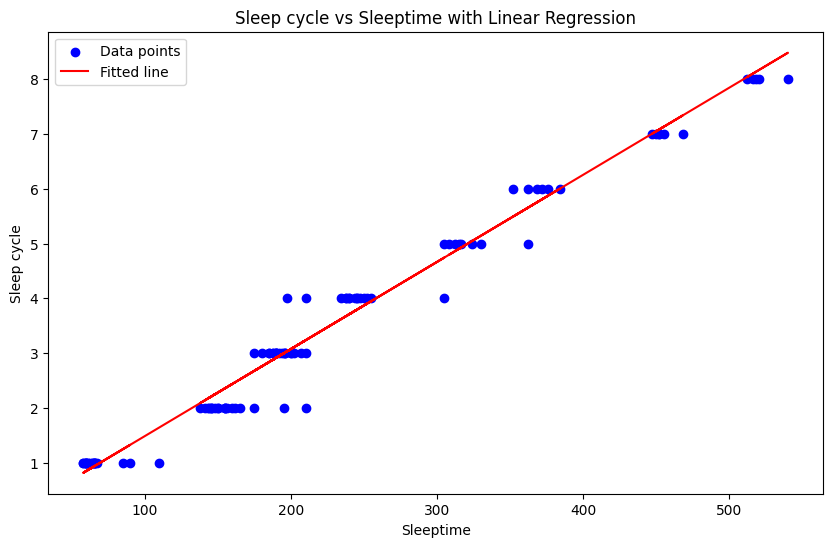

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# CSV 파일 읽기
df = pd.read_csv('/content/drive/MyDrive/sleep_pattern_demo.csv', encoding='cp949')

# 데이터 전처리
x = df['수면 패턴 시간'].values.astype(np.float64)
y = df['수면 패턴 주기'].values.astype(np.float64)

# x를 2D 배열로 변환
x = x.reshape(-1, 1)

# 데이터 분할 (훈련 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 선형 회귀 모델 초기화 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# 회귀 계수 및 절편
w = model.coef_[0]
b = model.intercept_

print(f"Final model parameters: w = {w:.10f}, b = {b:.10f}")

# 데이터와 회귀선 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, model.predict(x), color='red', label='Fitted line')  # Linear regression line
plt.xlabel('Sleeptime')
plt.ylabel('Sleep cycle')
plt.title('Sleep cycle vs Sleeptime with Linear Regression')
plt.legend()
plt.show()
print()

In [4]:
# 사용자 입력 및 예측
wanted_time = int(input("원하는 수면 시간을 분 단위로 입력해주세요: "))
limit_time = int(input("가장 많이 잘 수 있는 시간을 분 단위로 입력해주세요: "))

while True:
    mode = input("모드를 선택해주세요 - mode1<효율> mode2<최대 수면>: ")
    errorbefore = 1000
    errorafter = 1000
    beforetime = 0
    aftertime = 0
    modeword = ["효율", "최대 수면"]
    if mode in modeword:
        for i in range(1, 8, 1):
            remtime = (i - b) / w
            if remtime < wanted_time:
                error = wanted_time - remtime
                if error < errorbefore:
                    errorbefore = wanted_time - remtime
                    beforetime = remtime
            else:
                error = remtime - wanted_time
                if error < errorafter:
                    errorafter = remtime - wanted_time
                    aftertime = remtime
        if mode == "효율":
            if aftertime > limit_time:
                print("당신의 최대 효율 수면 시간은 {}분 입니다.".format(beforetime))
            else:
                if errorafter > errorbefore:
                    print("당신의 최대 효율 수면 시간은 {}분 입니다.".format(beforetime))
                else:
                    print("당신의 최대 효율 수면 시간은 {}분 입니다.".format(aftertime))
            break
        elif mode == "최대 수면":
            if aftertime > limit_time:
                print("당신의 최대 효율 수면 시간은 {}분 입니다.".format(beforetime))
            else:
                print("당신의 최대 효율 수면 시간은 {}분 입니다.".format(aftertime))
            break
    else:
        print("다시 입력해주세요")

원하는 수면 시간을 분 단위로 입력해주세요: 360
가장 많이 잘 수 있는 시간을 분 단위로 입력해주세요: 400
모드를 선택해주세요 - mode1<효율> mode2<최대 수면>: 효율
당신의 최대 효율 수면 시간은 383.913224595936분 입니다.
